Uses:  
    1. Validating the assumptions of the model - normal distribution, linearity etc.
    2. Understanding skew, density and outliers
    3. Whether any transformation is required like log transformation etc.
    4. Finding patterns/relationship between variables
    5. Dropping a variable if its distribution is constant

Motivation:  
1. Simplest way to make graphs for statistical analysis without requiring 
several lines of code
2. Several Python Visualization libraries but no clear winner
3. Matplotlib - powerful but requires to code every nut and bolt of the graph
4. Pandas - easy syntax but falls short of providing necessary graphical 
capabilities for effective data visualization required for statistical analysis
5. Seaborn - best so far
6. Bokeh - overkill for statistical data analysis!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
%matplotlib inline

In [2]:
df = pd.read_csv("./dataset/TITANIC_Vis.csv")
df.head()

,Name,Age,Gender,Class,Fare,Survival
0,"Allen, Miss. Elisabeth Walton",29.0,Female,1st,211.34,Survived
1,"Allison, Master. Hudson Trevor",1.0,Male,1st,151.55,Survived
2,"Allison, Miss. Helen Loraine",2.0,Female,1st,151.55,Died
3,"Allison, Mr. Hudson Joshua Creighton",30.0,Male,1st,151.55,Died
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0,Female,1st,151.55,Died


In [3]:
df.drop('Name', axis=1, inplace=True)
df.head()

,Age,Gender,Class,Fare,Survival
0,29.0,Female,1st,211.34,Survived
1,1.0,Male,1st,151.55,Survived
2,2.0,Female,1st,151.55,Died
3,30.0,Male,1st,151.55,Died
4,25.0,Female,1st,151.55,Died


In [4]:
df.index #Number of rows or obs

RangeIndex(start=0, stop=1309, step=1)

In [5]:
df.columns #Named list of columns

Index([u'Age', u'Gender', u'Class', u'Fare', u'Survival'], dtype='object')

In [6]:
df.dtypes #data types of columns

Age         float64
Gender       object
Class        object
Fare        float64
Survival     object
dtype: object

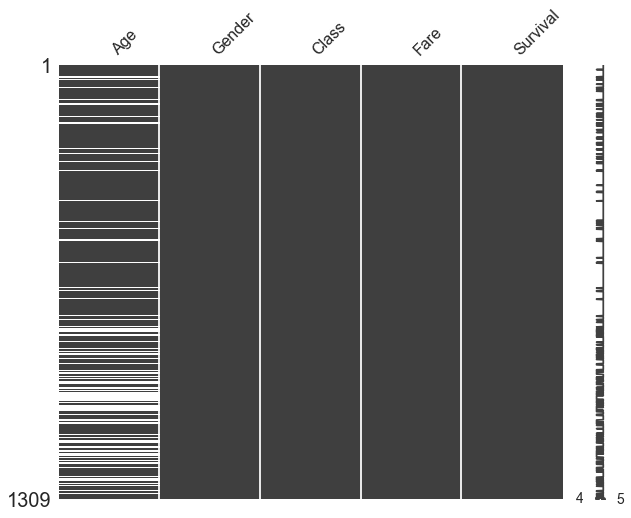

In [7]:
mn.matrix(df, figsize=(10,8)) #visualize missing data, not completely precise

In [8]:
df.dropna(axis=0, inplace=True) #drop rows where any column contains NA (NaN)

### Univariate Analysis - Analysis of Distribution

#### Categorical: Bar Chart

In [9]:
df.Gender.value_counts()

Male      657
Female    388
Name: Gender, dtype: int64

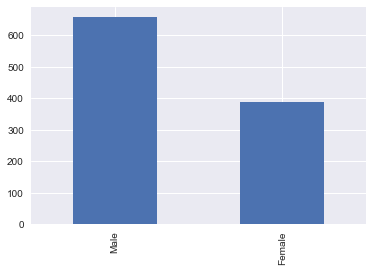

In [10]:
df.Gender.value_counts().plot(kind='bar')

#### Continuous: Histogram, Kernel Density Estimate, Boxplot, Swarmplot, Violinplot

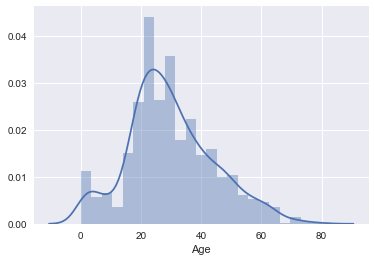

In [11]:
sns.distplot(df.Age) #Histogam + KDE

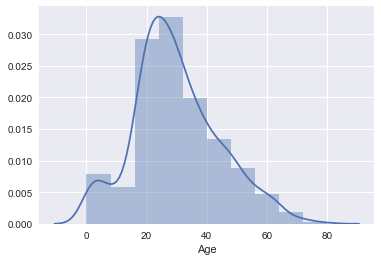

In [12]:
sns.distplot(df.Age, bins=10) #Histogam + KDE with configurable number of bins

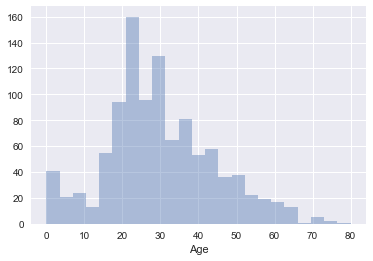

In [13]:
sns.distplot(df.Age, kde=False) #only Histogram

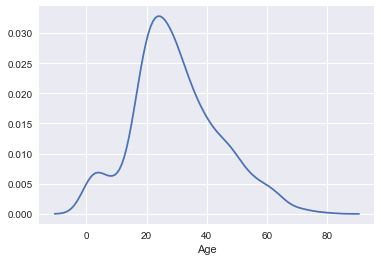

In [14]:
sns.distplot(df.Age, hist=False) #only KDE

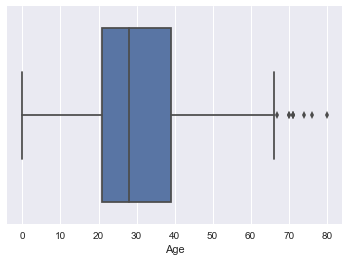

In [15]:
sns.boxplot(df.Age) #Boxplot

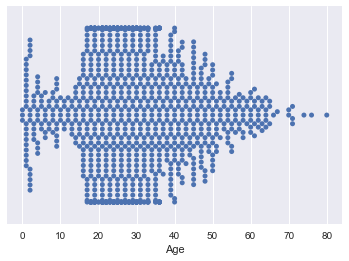

In [16]:
sns.swarmplot(df.Age) #To show data points

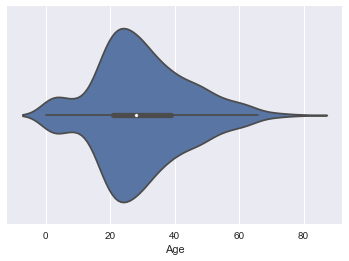

In [17]:
sns.violinplot(df.Age) #Boxplot + KDE

### Bivariate Analysis - Analysis of Relationship
Generally done between predictor and outcome variable  

Can be done between predictors to understand relationship between them

#### Continuous - Continuous : Scatter plot, Hexbin plot, Correlation matrix, Pairplot

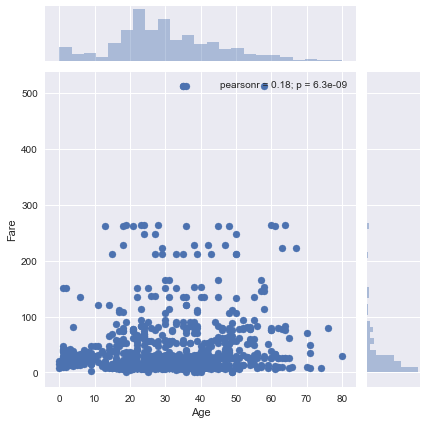

In [18]:
sns.jointplot(df.Age, df.Fare) #Scatter plot + Histogram of each variable

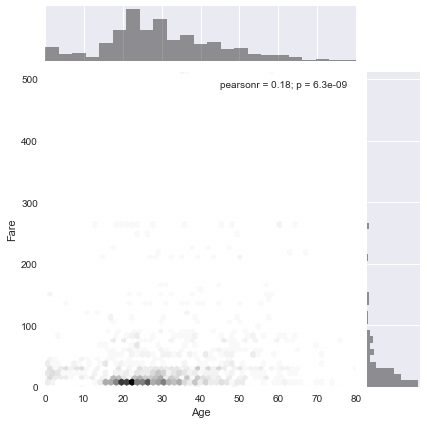

In [19]:
sns.jointplot(df.Age, df.Fare, kind='hex', color='k') #large no. of data points

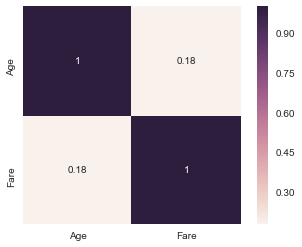

In [20]:
# Heatmap of Correlation matrix
cols = ['Age', 'Fare'] #pick columns that are continuous
cm = np.corrcoef(df[cols].values.T)
sns.heatmap(cm, annot=True, square=True, yticklabels=cols, xticklabels=cols)


##### Pairplot - To analyze relationship between all continuous variables

Pairplot automatically picks columns that are continuous in the dataset  

Make sure all NA values are taken care of

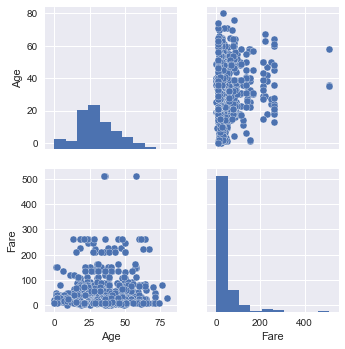

In [21]:
sns.pairplot(df)

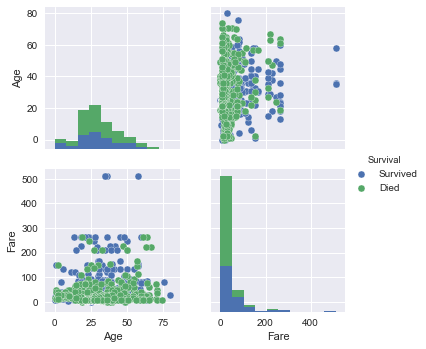

In [22]:
sns.pairplot(df, hue='Survival') #Add a categorical variable

#### Continuous - Categorical : Side by side Boxplot, Swarmplot and Violinplot

In [23]:
#We can add another categorical variable to the below analysis by adding argument hue e.g hue=df.Survival

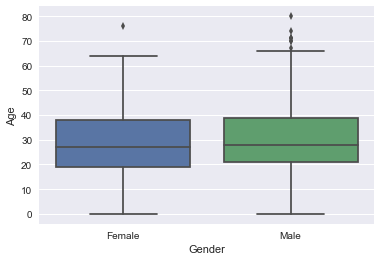

In [24]:
sns.boxplot(df.Gender, df.Age)

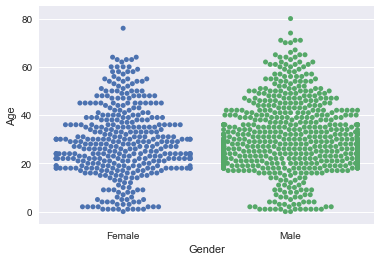

In [25]:
sns.swarmplot(df.Gender, df.Age)

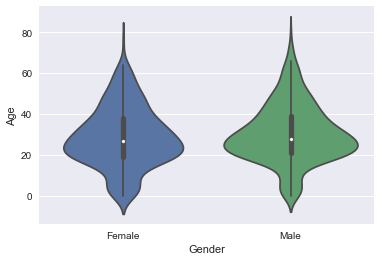

In [26]:
sns.violinplot(df.Gender, df.Age)

#### Categorical - Categorical : Crosstab barplot

In [27]:
table = pd.crosstab(df.Gender, df.Survival)

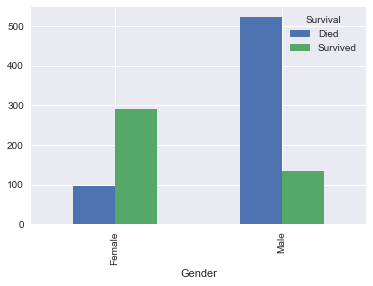

In [28]:
table.plot(kind='bar')

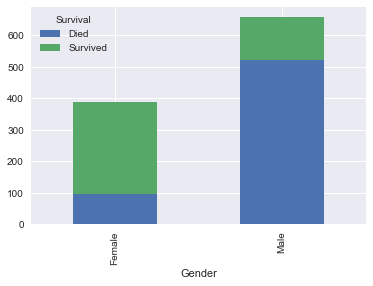

In [29]:
table.plot(kind='bar', stacked=True) #Stacked barplot